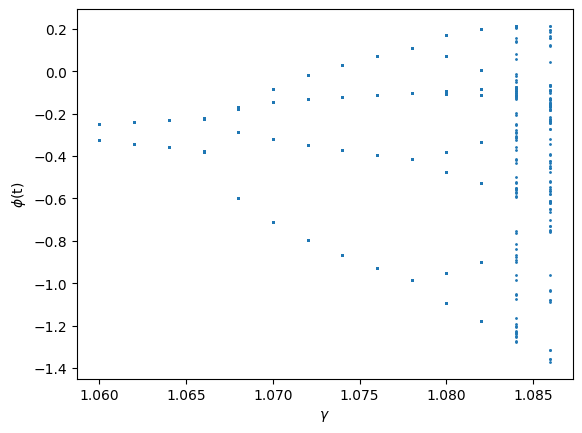

In [6]:
import numpy as np
from numpy import *
from scipy.integrate import odeint

def convert_angle(angle):
    """
    Convert any angle in the range 0 to 2pi into an angle in the range -pi to pi.
    """
    while angle > pi:
        angle -= 2 * pi
    while angle < -pi:
        angle += 2 * pi
    return angle

def pend(y,t,beta,wo,gamma,w):
    phi, omega = y
    dydt = [omega, -2*beta*omega - wo**2*np.sin(phi) + gamma*wo**2*np.cos(w*t)]
    return dydt

w = 2*pi #Set frequency to 2 pi 
wo = 1.5*w #Set the natural frequency to 1.5*w 
beta = wo/4 #Set damping constant 

tmax = 600
t = range(0,tmax)

gammaarray = arange(1.06,1.087,.002)

solarray = []
y0 = [-pi/2, 0.0] #Set the initial conditions, to start at rest at phi = 0 

for gamma in gammaarray: 
    elements = odeint(pend,y0,t,args=(beta,wo,gamma,w))
    elements = np.delete(elements,-1)
    solarray.append(elements )

    
phiarray = [[solarray[gamma][t] for t in range(500,600)] for gamma in range(0,len(solarray))]
phiarray = array(phiarray)
phiarray = phiarray.flatten()
phiarray = [i%(2*pi) for i in phiarray]
newgammaarray = [val for val in gammaarray for _ in range(100)]

phiarray = [convert_angle(phi) for phi in phiarray ]



import matplotlib.pyplot as plt

plt.scatter(newgammaarray,phiarray,s=1)
plt.xlabel("$\gamma$")
plt.ylabel("$\phi$(t)")
plt.show()

[[0.00000000e+00 0.00000000e+00]
 [1.06537742e-06 1.06542436e-02]
 [4.26062718e-06 2.12983961e-02]
 ...
 [8.84940065e-01 4.32436428e+00]
 [8.85804230e-01 4.31719811e+00]
 [8.86666961e-01 4.31002901e+00]]


Text(0, 0.5, '$\\dot{\\phi}(t)$')

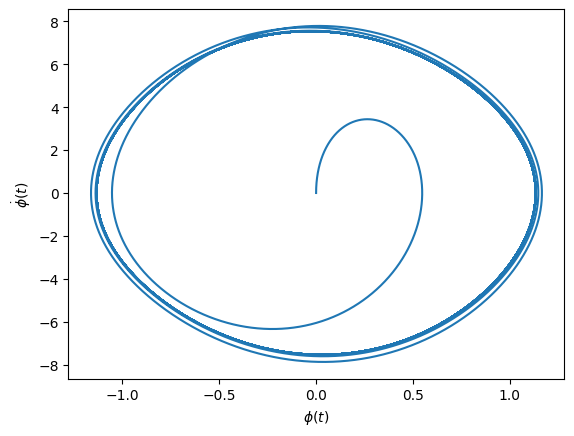

In [91]:
import numpy as np
from numpy import *
from scipy.integrate import odeint

def convert_angle(angle):
    """
    (from chatgpt) Convert any angle in the range 0 to 2pi into an angle in the range -pi to pi.
    """
    while angle > pi:
        angle -= 2 * pi
    while angle < -pi:
        angle += 2 * pi
    return angle

def pend(y,t,beta,wo,gamma,w):
    phi, omega = y
    dydt = [omega, -2*beta*omega - wo**2*np.sin(phi) + gamma*wo**2*np.cos(w*t)]
    return dydt

w = 2*pi #Set frequency to 2 pi 
wo = 1.5*w #Set the natural frequency to 1.5*w 
beta = wo/4 #Set damping constant 
y0 = [-pi/2,0.0]
tmax = 20
t = linspace(0,tmax,100000)
y0 = [0.0, 0.0] #Set the initial conditions, to start at rest at phi = 0 
gamma = .6



sol = odeint(pend,y0,t,args=(beta,wo,gamma,w))
phi = sol[:,0]
phi = [convert_angle(p) for p in phi]
phidot = sol[:,1]
print(sol)
plt.plot(phi,phidot)
plt.xlabel("$\phi (t)$")
plt.ylabel("$\dot{\phi}(t)$")

30000.0


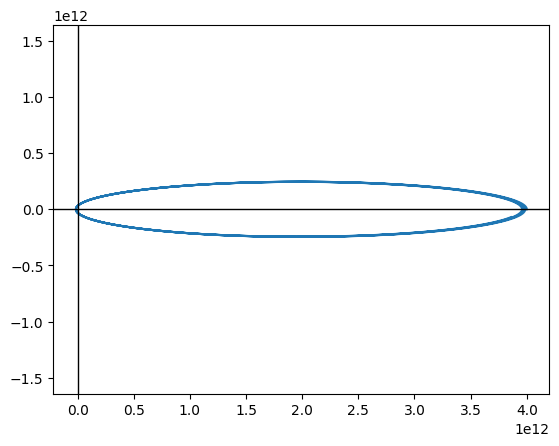

In [2]:
G = 6.67430e-11  # gravitational constant in m^3/(kg*s^2)
M = 1.989e30  # mass of the Sun in kg

from numpy import *
import numpy as np
def f(r,t): 
    x    = r[0]
    xdot = r[1]
    y    = r[2]
    ydot = r[3]
    fx   = xdot
    fxdot = -G*M*(x/sqrt(x**2 + y**2)**3)
    fy   = ydot
    fydot = -G*M*(y/sqrt(x**2 + y**2)**3)
    return(array([fx,fxdot,fy,fydot],float))

a = 0
b = 6000000000
N = 100000
h = (b-a)/(2*N)

print(h)

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([4e12, 0, 0, 500])


for t in tpoints: 
    xpoints.append(r[0])
    ypoints.append(r[2]) 
#     print(r)
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2e}'.format})


fig,ax = plt.subplots()
ax.plot(xpoints,ypoints)

ax.axis('equal')
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

In [1]:
G = 6.67430e-11  # gravitational constant in m^3/(kg*s^2)
M = 1.989e30  # mass of the Sun in kg

from numpy import *
import numpy as np
def f(r,t): 
    x    = r[0]
    xdot = r[1]
    y    = r[2]
    ydot = r[3]
    fx   = xdot
    fxdot = -G*M*(x/sqrt(x**2 + y**2)**3)
    fy   = ydot
    fydot = -G*M*(y/sqrt(x**2 + y**2)**3)
    return(array([fx,fxdot,fy,fydot],float))

a = 0
b = 6000000000
N = 100000
h = (b-a)/N
h = 60000

tpoints = arange(a,b,h)

r = array([4e12, 0, 0, 500])
xpoints = [r[0]]
ypoints = [r[2]]
delta = 1e3/(60*60*24*365)
delta = 1

def rk4(r,f,h): 
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    return (k1+2*k2+2*k3+k4)/6
i = 0
for t in range(0,5000000): 
    rhh = r 
    rk4h = rk4(rhh,f,h) 
    rhh += rk4(rhh,f,h) 
    rk4hh = rk4(rhh,f,h) 
    rhh += rk4(rhh,f,h) 
    
    rk42h = rk4(r,f,2*h)
    dif = (rk4h + rk4hh - rk42h)
#     print("Difference", dif)
    epsilonx = (1/30)*(dif[0])
#     print(epsilonx)
    epsilony = (1/30)*(dif[2])
#     print(epsilony)
    rho = (h*delta)/(sqrt(epsilonx**2 + epsilony**2))
    h = h*rho**(1/5)
#     print(rho)
#     print("rho ",rho)
#     print("h ", h)
    if epsilonx == epsilony and epsilony == 0: 
        break
        
    if rho < .9: 
        continue
    else:  
        r = rhh
        xpoints.append(r[0])
        ypoints.append(r[2])
        
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2e}'.format})


fig,ax = plt.subplots()
ax.plot(xpoints,ypoints)

ax.axis('equal')
# ax.axhline(0, color='black', lw=1)
# ax.axvline(0, color='black', lw=1)

[-1.49345808e+05 -9.95638749e-01  5.99999986e+07 -1.86682269e-05]
[-2.98691630e+05 -9.95638889e-01  5.99999943e+07 -3.73364609e-05]
[0. 0. 0. 0.]
[ 3.99999976e+12 -1.99127748e+00  1.19999998e+08  4.99999970e+02]
[ 3.99999976e+12 -1.99127748e+00  1.19999998e+08  4.99999970e+02]


C:\Users\seanr\AppData\Local\Temp\ipykernel_26640\1647991482.py:49: RuntimeWarning: divide by zero encountered in scalar divide
  rho = (h*delta)/(sqrt(epsilonx**2 + epsilony**2))


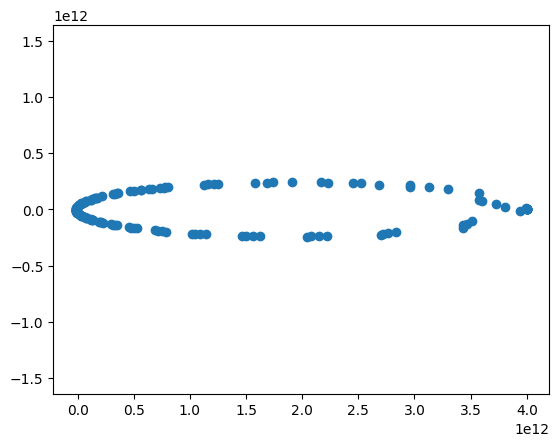

In [10]:
from numpy import *
import numpy as np
from scipy.integrate import RK45
import matplotlib.pyplot as plt

def f(t, r): 
    x    = r[0]
    xdot = r[1]
    y    = r[2]
    ydot = r[3]
    fx   = xdot
    fxdot = -G*M*(x/sqrt(x**2 + y**2)**3)
    fy   = ydot
    fydot = -G*M*(y/sqrt(x**2 + y**2)**3)
    return([fx, fxdot, fy, fydot])

G = 6.67430e-11  # gravitational constant in m^3/(kg*s^2)
M = 1.989e30  # mass of the Sun in kg
a = 0
b = 6000000000
N = 100000
h = 60000

r = array([4e12, 0, 0, 500])

solver = RK45(f, a, r, b)

tvals = [a]
rvals = [r]

while solver.status == 'running':
    solver.step()
    tvals.append(solver.t)
    rvals.append(solver.y)

# Extract the x and y coordinates from the solution
xvals = [r[0] for r in rvals]
yvals = [r[2] for r in rvals]

# Plot the solution
plt.scatter(xvals, yvals)
plt.axis('equal')

plt.show()


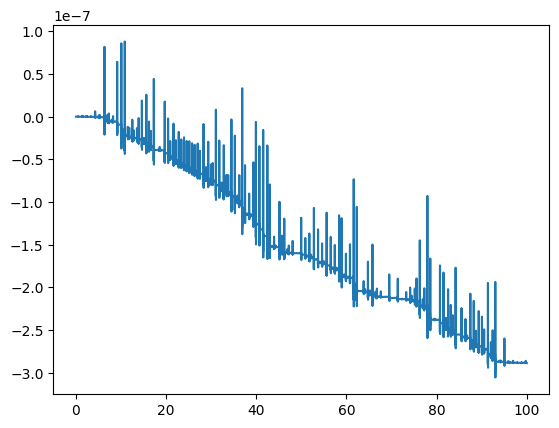

In [2]:
from numpy import *
import matplotlib.pyplot as plt

def f(r,t): 
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    ftheta1 = omega1
    fomega1 = -(omega1**2 * sin(2 * theta1 - 2 * theta2) + 2*omega2**2 * sin(theta1 - theta2) + (g/l)*(sin(theta1 - 2*theta2) + 3 * sin(theta1)))/(3 - cos(2*theta1 - 2*theta2))
    ftheta2 = omega2
    fomega2 = (4*omega1**2 * sin(theta1 - theta2) + omega2**2*sin(2*theta1 - 2*theta2) + 2*(g/l)*(sin(2*theta1 - theta2) - sin(theta2)))/(3 - cos(2*theta1 - 2*theta2))
    return(array([ftheta1,fomega1,ftheta2,fomega2],float))

a = 0
b = 100
N = 100000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
Epoints = []
l = .4
m = 1
g = 9.8
r = array([pi/2,0,pi/2,0])


for t in tpoints:
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    xpoints.append(theta1)
    ypoints.append(theta2) 
    E = m*l**2*(omega1**2 + (1/2)*omega2**2 + 2*omega1*omega2*cos(theta1 - theta2))-m*g*l*(2*cos(theta1) + cos(theta2))
    E = (1/2)*(m*l**2)*(omega1**2)    +   (1/2)*m*( l**2 * omega1**2 + l**2 * omega2**2 + (2*l**2)*omega1*omega2*cos(theta1 - theta2)) - (2*m*g*l*cos(theta1)) - (m*g*l*cos(theta2))
    
    Epoints.append(E)
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
    
plt.plot(tpoints,Epoints)